<a href="https://colab.research.google.com/github/bjking007/PROJECT/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#- 자동차 연비 데이터(`auto-mpg.csv`)를 로드한 후, 다음 사항을 수행하세요.
#1. `horsepower` 열의 결측치가 있는지 확인하고, 결측치를 `horsepower`의 중앙값(median)으로 대체하세요.
#2. `car_name` 열을 제거하고 새로운 DataFrame을 만드세요.
import pandas as pd

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv', header=None,na_values='?')
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

missing_count = df['horsepower'].isnull().sum()
print(f"'horsepower' 열의 결측치 개수: {missing_count}")

# horsepower의 중앙값으로 결측치 대체
median_hp = df['horsepower'].median()
df['horsepower'].fillna(median_hp, inplace=True)

# 'car_name' 열 제거 및 새로운 DataFrame 생성 (기존 코드에서 누락된 2번 항목)
df_cleaned = df.drop('name', axis=1)

# 결과 확인
print(df.head())

'horsepower' 열의 결측치 개수: 6
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                       name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


<ipython-input-16-623267393>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(median_hp, inplace=True)


In [ ]:

#연비(mpg)가 30 이상인 차량 필터링하여 high_mpg 생성
high_mpg = df[df['mpg'] >= 30][['mpg', 'horsepower', 'weight']].copy()

# 무게(weight) 대비 마력(horsepower) 비율 열 추가
high_mpg['hp_weight_ratio'] = high_mpg['horsepower'] / high_mpg['weight']

# 결과 확인
print(high_mpg.head())

      mpg  horsepower  weight  hp_weight_ratio
51   30.0        70.0  2074.0         0.033751
52   30.0        76.0  2065.0         0.036804
53   31.0        65.0  1773.0         0.036661
54   35.0        69.0  1613.0         0.042777
129  31.0        67.0  1950.0         0.034359


In [ ]:
# 그룹화하여 연비의 평균 및 표준편차, 마력의 최대 및 최소값 계산
grouped_stats = high_mpg.groupby(['cylinders', 'origin']).agg({
    'mpg': ['mean', 'std'],
    'horsepower': ['max', 'min']
}).reset_index()

# 컬럼 이름을 보기 좋게 수정
grouped_stats.columns = ['cylinders', 'origin', 'mpg_mean', 'mpg_std', 'hp_max', 'hp_min']

# 결과 확인
print(grouped_stats)

KeyError: 'cylinders'

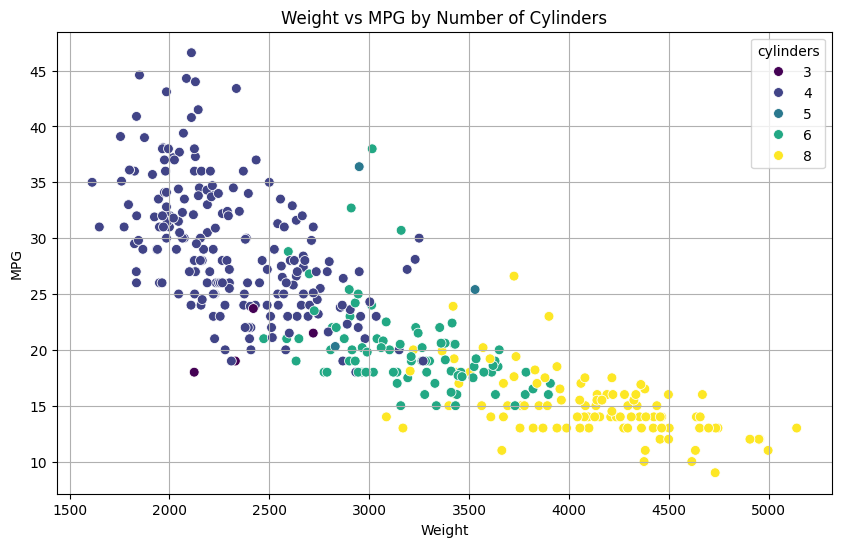

<ipython-input-23-1843533286>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='model year', y='mpg', palette='coolwarm') # 박스플롯 그리기


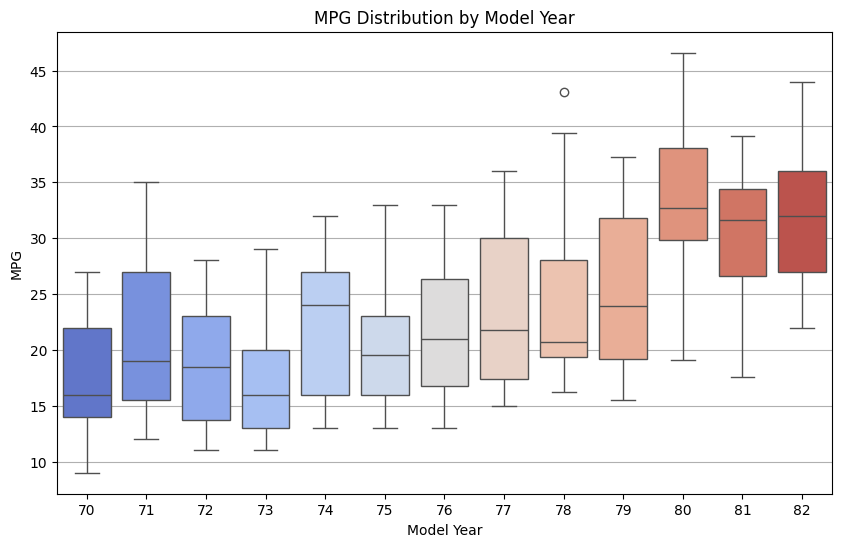

In [ ]:
# 필요한 라이브러리 가져오기
import matplotlib.pyplot as plt
import seaborn as sns

# 1. mpg(연비)와 weight(무게)의 관계를 실린더(cylinders) 수에 따라 다른 색상으로 나타내는 산점도 그리기
plt.figure(figsize=(10, 6)) # 플롯 크기 설정
sns.scatterplot(data=df, x='weight', y='mpg', hue='cylinders', palette='viridis', s=50) # 산점도 그리기
plt.title('Weight vs MPG by Number of Cylinders') # 제목 설정
plt.xlabel('Weight') # x축 레이블 설정
plt.ylabel('MPG') # y축 레이블 설정
plt.grid(True) # 그리드 표시
plt.show() # 플롯 보여주기

# 2. model_year에 따른 연비(mpg)의 변화를 박스플롯으로 시각화
plt.figure(figsize=(10, 6)) # 플롯 크기 설정
sns.boxplot(data=df, x='model year', y='mpg', palette='coolwarm') # 박스플롯 그리기
plt.title('MPG Distribution by Model Year') # 제목 설정
plt.xlabel('Model Year') # x축 레이블 설정
plt.ylabel('MPG') # y축 레이블 설정
plt.grid(axis='y') # y축 그리드 표시
plt.show() # 플롯 보여주기

상관계수 매트릭스:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.773453 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.841284  0.896017   
displacement -0.804203   0.950721      1.000000    0.895778  0.932824   
horsepower   -0.773453   0.841284      0.895778    1.000000  0.862442   
weight       -0.831741   0.896017      0.932824    0.862442  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.686590 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.413733 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.452096 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.686590   -0.413733 -0.452096  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.00000

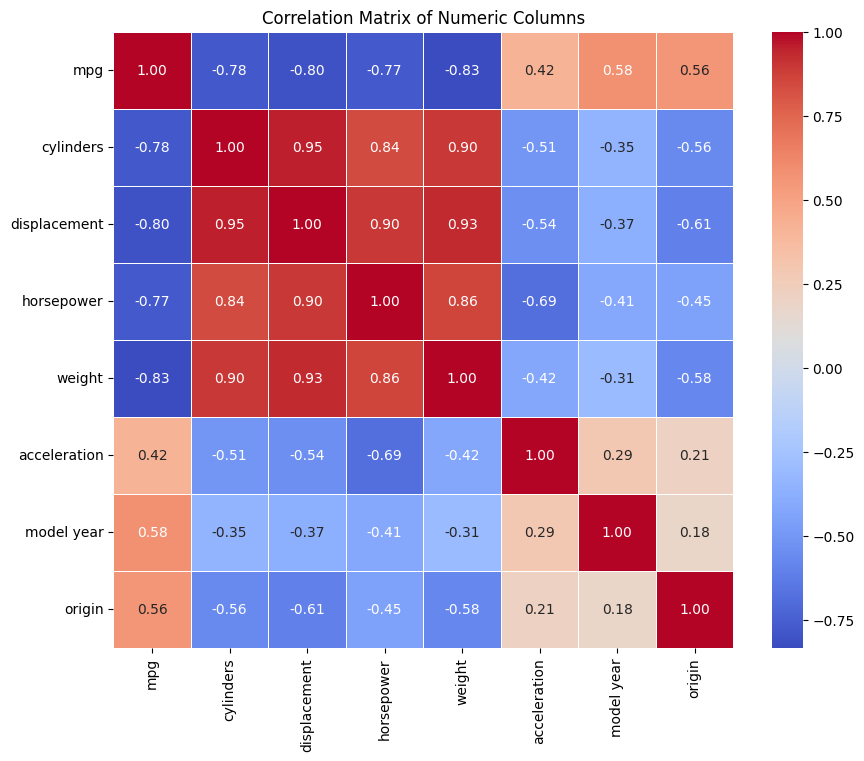

가장 강한 상관관계 (절댓값): 0.95
가장 강한 상관관계를 갖는 두 변수: ('cylinders', 'displacement')
상관계수 매트릭스:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.773453 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.841284  0.896017   
displacement -0.804203   0.950721      1.000000    0.895778  0.932824   
horsepower   -0.773453   0.841284      0.895778    1.000000  0.862442   
weight       -0.831741   0.896017      0.932824    0.862442  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.686590 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.413733 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.452096 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.686590   -0.413733 -0.452096  
we

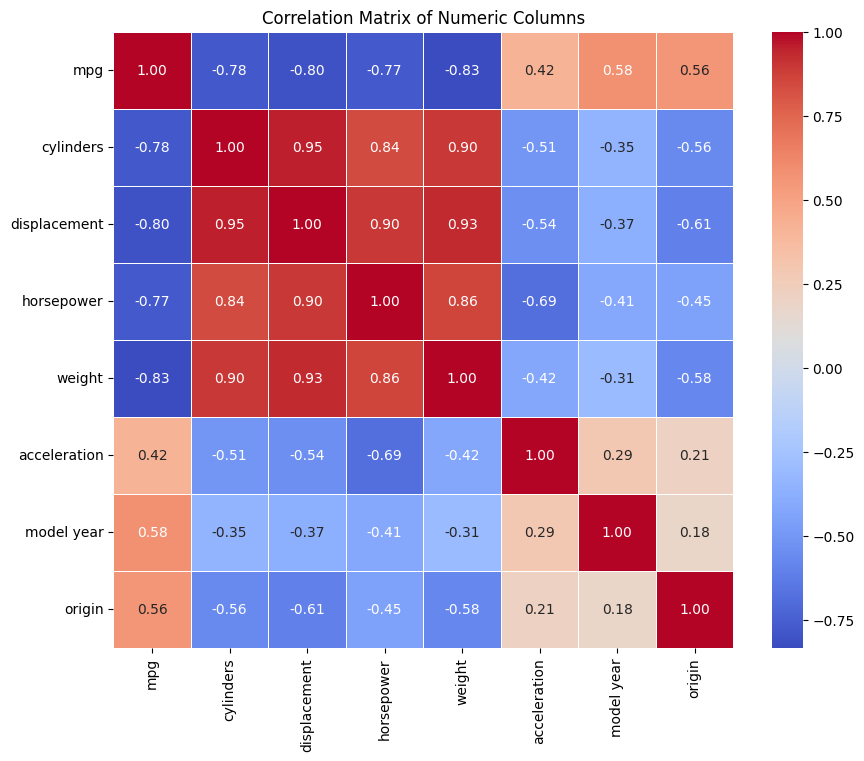

가장 강한 상관관계 (절댓값): 0.95
가장 강한 상관관계를 갖는 두 변수: ('cylinders', 'displacement')


In [ ]:
#  데이터의 모든 수치형 열 간 상관계수 매트릭스를 구하세요.
# 수치형 데이터만 포함하는 DataFrame 선택
df_numeric = df.select_dtypes(include='number')

# 상관계수 매트릭스 계산
correlation_matrix = df_numeric.corr()

print("상관계수 매트릭스:")
print(correlation_matrix)

# Seaborn을 활용하여 상관계수 히트맵(heatmap)을 시각화하세요.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# 가장 강한 상관관계(절댓값 기준)를 갖는 두 변수의 이름을 적으세요.
# 대각선(자기 자신과의 상관관계)을 제외하고 가장 큰 절댓값을 찾습니다.
# np.fill_diagonal 함수를 사용하기 위해 numpy를 import 합니다.
import numpy as np
np.fill_diagonal(correlation_matrix.values, 0) # 대각선 값을 0으로 채워 자기 자신과의 상관관계를 제외

# 절댓값이 가장 큰 값을 갖는 쌍 찾기
max_corr = correlation_matrix.abs().max().max()
max_corr_pair = correlation_matrix.abs().stack().idxmax()

print(f"가장 강한 상관관계 (절댓값): {max_corr:.2f}")
print(f"가장 강한 상관관계를 갖는 두 변수: {max_corr_pair}")

# 상관계수 매트릭스 계산
correlation_matrix = df_numeric.corr()

print("상관계수 매트릭스:")
print(correlation_matrix)

# Seaborn을 활용하여 상관계수 히트맵(heatmap)을 시각화하세요.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# 가장 강한 상관관계(절댓값 기준)를 갖는 두 변수의 이름을 적으세요.
# 대각선(자기 자신과의 상관관계)을 제외하고 가장 큰 절댓값을 찾습니다.
# np.fill_diagonal 함수를 사용하기 위해 numpy를 import 합니다.
import numpy as np
np.fill_diagonal(correlation_matrix.values, 0) # 대각선 값을 0으로 채워 자기 자신과의 상관관계를 제외

# 절댓값이 가장 큰 값을 갖는 쌍 찾기
max_corr = correlation_matrix.abs().max().max()
max_corr_pair = correlation_matrix.abs().stack().idxmax()

print(f"가장 강한 상관관계 (절댓값): {max_corr:.2f}")
print(f"가장 강한 상관관계를 갖는 두 변수: {max_corr_pair}")